14:50:10 - cmdstanpy - INFO - Chain [1] start processing
14:50:10 - cmdstanpy - INFO - Chain [1] done processing


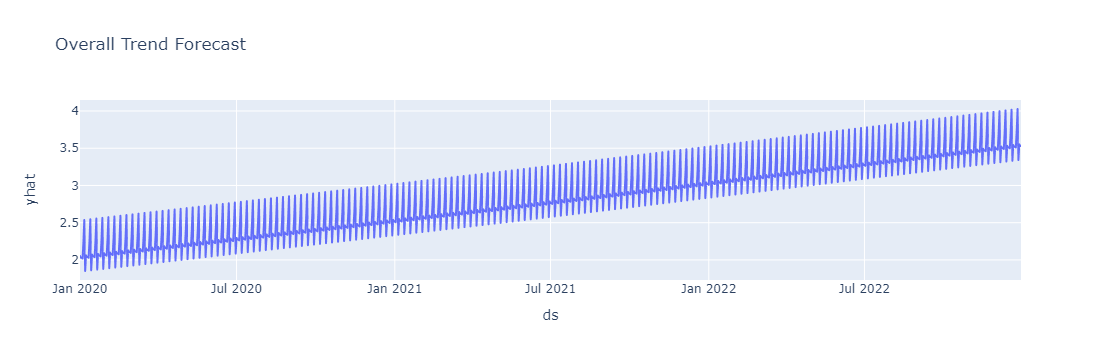

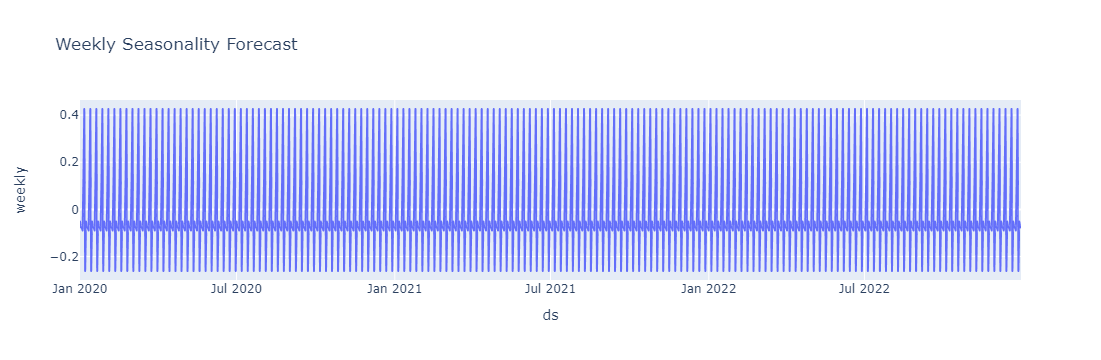

In [5]:
import pandas as pd
import numpy as np
from prophet import Prophet
import plotly.express as px

# Set the number of data points and frequency
n_points = 365 * 2  # 2 years of data
freq = 'D'  # Daily frequency

# Define the trend component
trend = np.linspace(0, 1, n_points)

# Define the seasonal components
weekly_pattern = [1, 1, 1, 1, 1.2, 1.5, 0.8]
yearly_pattern = [1.2, 1, 0.9, 1, 1.1, 0.8, 1.3, 1.2, 1, 0.9, 0.8, 1.1]

# Adjust the length of seasonal components
weekly_seasonality = np.tile(weekly_pattern, int(np.ceil(n_points / len(weekly_pattern))))
yearly_seasonality = np.tile(yearly_pattern, int(np.ceil(n_points / len(yearly_pattern))))

# Slice to match the length of the time series data
weekly_seasonality = weekly_seasonality[:n_points]
yearly_seasonality = yearly_seasonality[:n_points]

# Combine the components and add noise
data = trend + weekly_seasonality + yearly_seasonality + np.random.normal(0, 0.1, n_points)

# Create a date range
dates = pd.date_range(start='2020-01-01', periods=n_points, freq=freq)

# Create a DataFrame
df = pd.DataFrame({'ds': dates, 'y': data})

# Fit the Prophet model
model = Prophet()
model.fit(df)

# Generate future dates for forecasting
future = model.make_future_dataframe(periods=365)  # Forecast for 1 year

# Make predictions
forecast = model.predict(future)

# Plot the forecast
# Plot the overall trend using Plotly Express
fig_trend = px.line(forecast, x='ds', y='yhat', title='Overall Trend Forecast')
fig_trend.update_traces(mode='lines')

# Plot the weekly seasonality using Plotly Express
weekly_seasonality_df = forecast[['ds', 'weekly']].copy()
weekly_seasonality_df['ds'] = pd.to_datetime(weekly_seasonality_df['ds'])
fig_weekly_seasonality = px.line(weekly_seasonality_df, x='ds', y='weekly', title='Weekly Seasonality Forecast')
fig_weekly_seasonality.update_traces(mode='lines')

# Show both plots
fig_trend.show()
fig_weekly_seasonality.show()

In [13]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Generate date range for September to December
start_date_sep = "2019-09-01"
end_date_sep = "2019-09-30"
start_date_oct = "2019-10-01"
end_date_oct = "2019-10-31"
start_date_nov = "2019-11-01"
end_date_nov = "2019-11-30"
start_date_dec = "2019-12-01"
end_date_dec = "2019-12-31"

date_range_sep = pd.date_range(start=start_date_sep, end=end_date_sep)
date_range_oct = pd.date_range(start=start_date_oct, end=end_date_oct)
date_range_nov = pd.date_range(start=start_date_nov, end=end_date_nov)
date_range_dec = pd.date_range(start=start_date_dec, end=end_date_dec)

# Generate synthetic data for each month
mean_quantity = 250  # Mean quantity sold per day
noise_level = 50     # Standard deviation for noise
seasonality_factor = 1.2  # Factor to adjust seasonality compared to December

def generate_month_data(date_range):
    quantity_values = []
    for date in date_range:
        # Generate quantity with some seasonality and noise
        quantity = mean_quantity * seasonality_factor + np.random.normal(scale=noise_level)
        # Ensure quantity doesn't go negative
        quantity = max(0, quantity)
        # Round to the nearest integer
        quantity = round(quantity)
        quantity_values.append(quantity)
    return quantity_values

quantity_values_sep = generate_month_data(date_range_sep)
quantity_values_oct = generate_month_data(date_range_oct)
quantity_values_nov = generate_month_data(date_range_nov)
quantity_values_dec = generate_month_data(date_range_dec)

# Create DataFrames for each month
df_sep = pd.DataFrame({'Date': date_range_sep, 'Quantity': quantity_values_sep})
df_oct = pd.DataFrame({'Date': date_range_oct, 'Quantity': quantity_values_oct})
df_nov = pd.DataFrame({'Date': date_range_nov, 'Quantity': quantity_values_nov})
df_dec = pd.DataFrame({'Date': date_range_dec, 'Quantity': quantity_values_dec})

# Concatenate all DataFrames
combined_df = pd.concat([df_sep, df_oct, df_nov, df_dec])

# Reset index to have a continuous index
combined_df.reset_index(drop=True, inplace=True)

# Save the combined DataFrame to CSV
combined_df.to_csv('synthetic.csv', index=False)

print("Combined data saved to 'combined_data.csv'")

Combined data saved to 'combined_data.csv'


In [20]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Generate date range for September to December
start_date_sep = "2019-09-01"
end_date_sep = "2019-09-30"
start_date_oct = "2019-10-01"
end_date_oct = "2019-10-31"
start_date_nov = "2019-11-01"
end_date_nov = "2019-11-30"
start_date_dec = "2019-12-01"
end_date_dec = "2019-12-31"

date_range_sep = pd.date_range(start=start_date_sep, end=end_date_sep)
date_range_oct = pd.date_range(start=start_date_oct, end=end_date_oct)
date_range_nov = pd.date_range(start=start_date_nov, end=end_date_nov)
date_range_dec = pd.date_range(start=start_date_dec, end=end_date_dec)

# Total quantity and number of records for each month
total_records = 9994
days_sep = len(date_range_sep)
days_oct = len(date_range_oct)
days_nov = len(date_range_nov)
days_dec = len(date_range_dec)

# Calculate the mean quantity sold per day for each month
mean_quantity_sep = 250
mean_quantity_oct = 250
mean_quantity_nov = 250
mean_quantity_dec = 250

# Generate synthetic data for each month
def generate_daily_sales(date_range, mean_quantity):
    total_sales = int(np.random.normal(loc=mean_quantity, scale=50))  # Total sales for the day
    if total_sales <= 0:  # Ensure total sales is at least 1
        total_sales = 1
    sales = np.random.randint(1, total_sales, size=np.random.randint(1, 20))  # Generate random sales quantities
    return sales

# Generate data for September
data_sep = []
for date in date_range_sep:
    daily_sales = generate_daily_sales(date_range_sep, mean_quantity_sep)
    for sale in daily_sales:
        data_sep.append({'date': date, 'quantity': sale})

# Generate data for October
data_oct = []
for date in date_range_oct:
    daily_sales = generate_daily_sales(date_range_oct, mean_quantity_oct)
    for sale in daily_sales:
        data_oct.append({'date': date, 'quantity': sale})

# Generate data for November
data_nov = []
for date in date_range_nov:
    daily_sales = generate_daily_sales(date_range_nov, mean_quantity_nov)
    for sale in daily_sales:
        data_nov.append({'date': date, 'quantity': sale})

# Generate data for December
data_dec = []
for date in date_range_dec:
    daily_sales = generate_daily_sales(date_range_dec, mean_quantity_dec)
    for sale in daily_sales:
        data_dec.append({'date': date, 'quantity': sale})

# Create DataFrames for each month
df_sep = pd.DataFrame(data_sep)
df_oct = pd.DataFrame(data_oct)
df_nov = pd.DataFrame(data_nov)
df_dec = pd.DataFrame(data_dec)

# Concatenate all DataFrames
combined_df = pd.concat([df_sep, df_oct, df_nov, df_dec])

# Reset index to have a continuous index
combined_df.reset_index(drop=True, inplace=True)

# Shuffle the data
combined_df = combined_df.sample(frac=1).reset_index(drop=True)

# Save the combined DataFrame to CSV
combined_df.to_csv('combined_data.csv', index=False)

print("Combined data saved to 'combined_data.csv'")

Combined data saved to 'combined_data.csv'
